In [1]:
!pip install librosa


  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/8c/8a/2d231b35456506b7c98b3ab9bbf07917b205fed8615d2e59e976ab497fff/librosa-0.10.2.post1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for soundfile>=0.12.1 from https://files.pythonhosted.org/packages/50/ff/26a4ee48d0b66625a4e4028a055b9f25bc9d7c7b2d17d21a45137621a50d/soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for pooch>=1.1 from https://files.pythonhosted.org/packages/a8/87/77cc11c7a9ea9fd05503def69e3d18605852cd0d4b0d3b8f15bbeb3ef1d1/pooch-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for soxr>=0.3.2 from https://files.pythonhosted.org/packages/0d/95/8398287a3a00d006ebbe5fcada88bb2536acde2beecce892ff091e1c1a3b

# Understanding the audio data and ploting the audio waves 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename='dataset/dog_bark.wav'

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

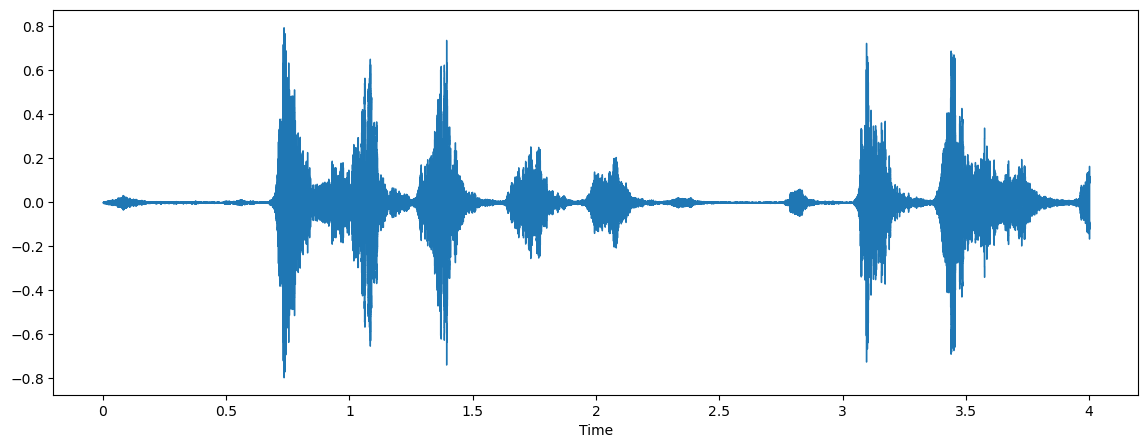

In [4]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

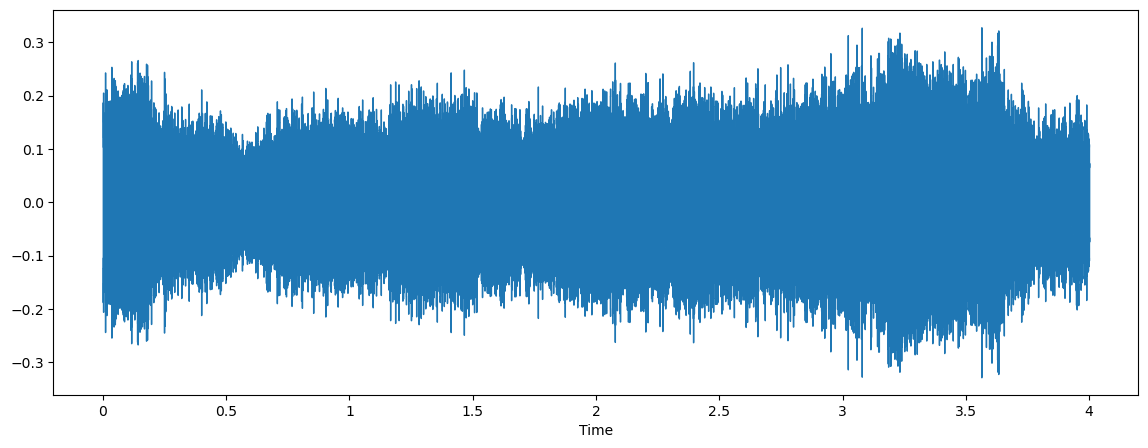

In [5]:
### Sound
filename='dataset/55020-4-0-10.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [6]:
sample_rate

22050

In [7]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [8]:
wave_sample_rate

44100

In [9]:
wave_audio

array([[   23,  5593],
       [-1558,  3828],
       [-1584,  4969],
       ...,
       [  393,   -33],
       [-3723, -3311],
       [-1445,  -551]], dtype=int16)

In [10]:
data

array([ 0.04642466,  0.05965733,  0.18736997, ...,  0.01821592,
       -0.04577923, -0.04770232], dtype=float32)

In [11]:
import pandas as pd

metadata=pd.read_csv('dataset/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [12]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [13]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='dataset/55020-4-0-10.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [14]:
print(librosa_audio_data)

[ 0.04642466  0.05965733  0.18736997 ...  0.01821592 -0.04577923
 -0.04770232]


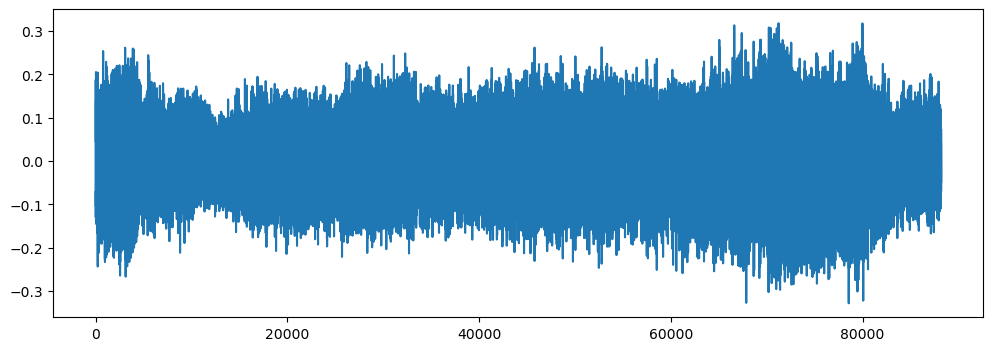

In [15]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [16]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [17]:
wave_audio

array([[   23,  5593],
       [-1558,  3828],
       [-1584,  4969],
       ...,
       [  393,   -33],
       [-3723, -3311],
       [-1445,  -551]], dtype=int16)

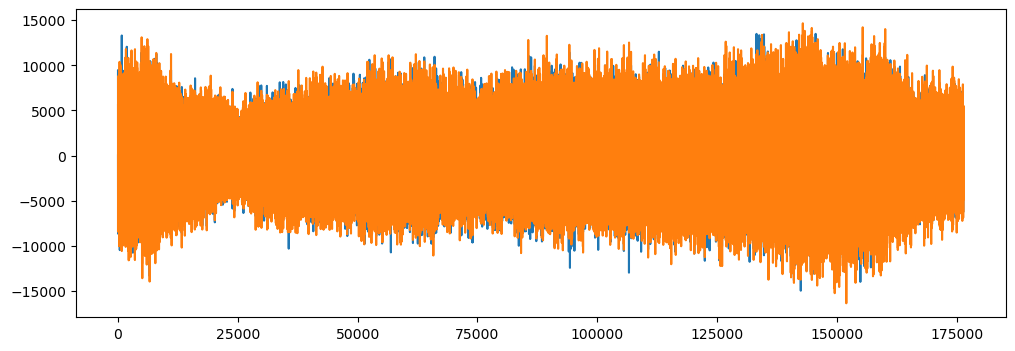

In [18]:
# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Feature extraction ,MFCC feature extraction using librosa 

In [19]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)
mfccs

(40, 173)


array([[-1.7799449e+02, -1.4696956e+02, -1.4773167e+02, ...,
        -1.8297527e+02, -1.8429605e+02, -2.0797359e+02],
       [-5.1270935e+01, -4.9053757e+01, -5.1933678e+01, ...,
        -5.4075943e+01, -5.0752636e+01, -5.4901402e+01],
       [ 2.8993000e+01,  3.1693333e+01,  3.1566387e+01, ...,
         3.2875561e+01,  3.3047325e+01,  3.1286522e+01],
       ...,
       [-1.2228787e+00, -4.0474057e-02,  2.1634202e+00, ...,
         6.6813984e+00,  4.4880514e+00,  7.7716198e+00],
       [ 1.5992243e+00,  1.5302262e+00,  1.8878797e+00, ...,
        -6.3575416e+00, -8.0985851e+00, -4.3446455e+00],
       [-5.2213430e+00, -6.0232663e+00, -2.8986173e+00, ...,
         4.1138172e+00,  7.1810427e+00,  6.2299414e+00]], dtype=float32)

In [20]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='dataset/audio/'
metadata=pd.read_csv('dataset/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [56]:
import librosa
import numpy as np

def features_extractor(file):
    try:
        audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        
    except Exception as e:
        print(f"Error extracting features from {file}: {e}")
        return None
    
    return mfccs_scaled_features


In [22]:
# pip install resampy

In [23]:
import numpy as np
import resampy
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [11:16,  5.05it/s]C:\Users\whynew\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [25:32,  7.70it/s]C:\Users\whynew\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [25:32, 13.66it/s]C:\Users\whynew\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [26:40,  5.45it/s]


In [24]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [25]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [26]:
X.shape

(8732, 40)

In [27]:
### Label Encoding
y=np.array(pd.get_dummies(y))
y.shape

(8732, 10)

In [28]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [30]:
y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [31]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(1747, 10)

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [33]:
### No of classes
num_labels=y.shape[1]

In [34]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               

In [35]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [36]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


214/219 [============================>.] - ETA: 0s - loss: 10.3931 - accuracy: 0.1304
Epoch 1: val_loss improved from inf to 2.28527, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 6s 13ms/step - loss: 10.2471 - accuracy: 0.1293 - val_loss: 2.2853 - val_accuracy: 0.1276
Epoch 2/100
 12/219 [>.............................] - ETA: 0s - loss: 2.7199 - accuracy: 0.1198

C:\Users\whynew\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


210/219 [===========================>..] - ETA: 0s - loss: 2.4828 - accuracy: 0.1234
Epoch 2: val_loss improved from 2.28527 to 2.25282, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 2.4772 - accuracy: 0.1228 - val_loss: 2.2528 - val_accuracy: 0.1173
Epoch 3/100
218/219 [============================>.] - ETA: 0s - loss: 2.2989 - accuracy: 0.1363
Epoch 3: val_loss improved from 2.25282 to 2.18521, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 12ms/step - loss: 2.2986 - accuracy: 0.1366 - val_loss: 2.1852 - val_accuracy: 0.1912
Epoch 4/100
214/219 [============================>.] - ETA: 0s - loss: 2.2423 - accuracy: 0.1657
Epoch 4: val_loss improved from 2.18521 to 2.13528, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 10ms/step - loss: 2.2409 - accuracy: 0.1658 - val_loss: 2.1353 - val_accuracy: 0.2232
Epoch

219/219 [==============================] - 2s 11ms/step - loss: 1.4721 - accuracy: 0.4850 - val_loss: 1.2629 - val_accuracy: 0.5781
Epoch 27/100
215/219 [============================>.] - ETA: 0s - loss: 1.4251 - accuracy: 0.5031
Epoch 27: val_loss improved from 1.26289 to 1.25179, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 10ms/step - loss: 1.4235 - accuracy: 0.5031 - val_loss: 1.2518 - val_accuracy: 0.5965
Epoch 28/100
218/219 [============================>.] - ETA: 0s - loss: 1.4326 - accuracy: 0.5013
Epoch 28: val_loss improved from 1.25179 to 1.24213, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 10ms/step - loss: 1.4328 - accuracy: 0.5012 - val_loss: 1.2421 - val_accuracy: 0.6073
Epoch 29/100
218/219 [============================>.] - ETA: 0s - loss: 1.3990 - accuracy: 0.5185
Epoch 29: val_loss improved from 1.24213 to 1.19940, saving model to saved_models\audio_classi

218/219 [============================>.] - ETA: 0s - loss: 1.1475 - accuracy: 0.6054
Epoch 52: val_loss did not improve from 0.96449
219/219 [==============================] - 2s 7ms/step - loss: 1.1473 - accuracy: 0.6053 - val_loss: 0.9742 - val_accuracy: 0.6835
Epoch 53/100
214/219 [============================>.] - ETA: 0s - loss: 1.1321 - accuracy: 0.6202
Epoch 53: val_loss improved from 0.96449 to 0.95774, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 10ms/step - loss: 1.1307 - accuracy: 0.6213 - val_loss: 0.9577 - val_accuracy: 0.6817
Epoch 54/100
219/219 [==============================] - ETA: 0s - loss: 1.1378 - accuracy: 0.6112
Epoch 54: val_loss did not improve from 0.95774
219/219 [==============================] - 2s 10ms/step - loss: 1.1378 - accuracy: 0.6112 - val_loss: 0.9656 - val_accuracy: 0.6817
Epoch 55/100
218/219 [============================>.] - ETA: 0s - loss: 1.1079 - accuracy: 0.6261
Epoch 55: val_loss imp

217/219 [============================>.] - ETA: 0s - loss: 1.0057 - accuracy: 0.6561
Epoch 79: val_loss did not improve from 0.84610
219/219 [==============================] - 2s 11ms/step - loss: 1.0050 - accuracy: 0.6564 - val_loss: 0.8642 - val_accuracy: 0.7464
Epoch 80/100
214/219 [============================>.] - ETA: 0s - loss: 1.0233 - accuracy: 0.6501
Epoch 80: val_loss did not improve from 0.84610
219/219 [==============================] - 2s 7ms/step - loss: 1.0218 - accuracy: 0.6513 - val_loss: 0.8878 - val_accuracy: 0.7132
Epoch 81/100
215/219 [============================>.] - ETA: 0s - loss: 1.0158 - accuracy: 0.6570
Epoch 81: val_loss did not improve from 0.84610
219/219 [==============================] - 2s 7ms/step - loss: 1.0165 - accuracy: 0.6563 - val_loss: 0.8730 - val_accuracy: 0.7264
Epoch 82/100
217/219 [============================>.] - ETA: 0s - loss: 1.0017 - accuracy: 0.6587
Epoch 82: val_loss improved from 0.84610 to 0.83816, saving model to saved_models\a

In [37]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7601602673530579


In [60]:
class_names = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']

wav_files = [
    "dataset/audio/fold2/74507-0-0-20.wav",
    "dataset/audio/fold4/7389-1-2-1.wav",
    # Add more file paths as needed
]

for filename in wav_files:
    prediction_feature = features_extractor(filename)
    
    if prediction_feature is not None:
        prediction_feature = prediction_feature.reshape(1, -1)
        predicted_probabilities = model.predict(prediction_feature)
        predicted_class_index = np.argmax(predicted_probabilities, axis=1)
        predicted_class = class_names[predicted_class_index[0]]
        
        print(f'Predicted class for {filename}: {predicted_class}')
    else:
        print(f'Error extracting features for {filename}')
    print()  # Add a newline for separation


1/1 [==============================] - 0s 61ms/step
Predicted class for dataset/audio/fold2/74507-0-0-20.wav: air_conditioner

1/1 [==============================] - 0s 65ms/step
Predicted class for dataset/audio/fold4/7389-1-2-1.wav: car_horn



In [61]:
model.save('voice_classifier.h5')